In [1]:
PROJECT_FOLDER

NameError: name 'PROJECT_FOLDER' is not defined

In [8]:
PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"

In [14]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [10]:
!echo $PATH

/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/bin:/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin


# Install DensePose

## Setting Anaconda, install packages and set dependencies

In [3]:
import os
from os.path import exists, join, basename, splitext

# install Anaconda Python 2.7 to control the dependencies
# see for more info: 
if not exists(PROJECT_FOLDER+'/anaconda2'):
    print("installing Anaconda2...")
    !wget -q https://repo.anaconda.com/archive/Anaconda2-2019.03-Linux-x86_64.sh
    !chmod +x Anaconda2-2019.03-Linux-x86_64.sh
    !mv Anaconda2-2019.03-Linux-x86_64.sh $PROJECT_FOLDER/
    !bash $PROJECT_FOLDER/Anaconda2-2019.03-Linux-x86_64.sh -b -f -p $PROJECT_FOLDER/anaconda2

    #set environment variables   
    os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
    os.environ['PATH'] = PROJECT_FOLDER+"/anaconda2/bin:" + os.environ['PATH']
    
    
    # install PyTorch
    !conda install -y pyyaml=3.12
    !conda install -y mkl-include
    !conda install -y pytorch=1.0.1 torchvision cudatoolkit=10.0 -c pytorch
    !ln -s $PROJECT_FOLDER/anaconda2/lib/python2.7/site-packages/torch/lib/ $PROJECT_FOLDER/anaconda2/lib/python2.7/site-packages/
    # install GCC 4.9
    !conda install -y -c serge-sans-paille gcc_49
    !ln -fs $PROJECT_FOLDER/anaconda2/lib/libmpfr.so $PROJECT_FOLDER/anaconda2/lib/libmpfr.so.4
    os.environ['CC'] = PROJECT_FOLDER+"/anaconda2/bin/gcc-4.9"
    os.environ['CXX'] = PROJECT_FOLDER+"/anaconda2/bin/g++-4.9"
    # protobuf 3.5
    #!apt-get -qq remove -y protobuf-compiler
    !conda install -y protobuf=3.5
    # pycocotools
    !conda install -y -c conda-forge pycocotools

#we need some headers from the pytorch source
if not exists(PROJECT_FOLDER+"/pytorch"):
    print("preparing Pytorch...")
    !git clone -q --depth 1 --recursive -b v1.0.1 https://github.com/pytorch/pytorch
    !mv pytorch $PROJECT_FOLDER/
print("DONE!")

installing Anaconda2...
PREFIX=/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2
installing: python-2.7.16-h9bab390_0 ...
using -f (force) option
Python 2.7.16 :: Anaconda, Inc.
installing: conda-env-2.6.0-1 ...
using -f (force) option
installing: blas-1.0-mkl ...
using -f (force) option
installing: ca-certificates-2019.1.23-0 ...
using -f (force) option
installing: intel-openmp-2019.3-199 ...
using -f (force) option
installing: libgcc-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
installing: libgfortran-ng-7.3.0-hdf63c60_0 ...
using -f (force) option
installing: libstdcxx-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
installing: bzip2-1.0.6-h14c3975_5 ...
using -f (force) option
installing: expat-2.2.6-he6710b0_0 ...
using -f (force) option
installing: fribidi-1.0.5-h7b6447c_0 ...
using -f (force) option
installing: gmp-6.1.2-h6c8ec71_1 ...
using -f (force) option
installing: graphite2-1.3.13-h23475e2_0 ...
using -f (force) option
installing: icu-58.2-h9c2bf20_1 ...

using -f (force) option
installing: pycparser-2.19-py27_0 ...
using -f (force) option
installing: pycrypto-2.6.1-py27h14c3975_9 ...
using -f (force) option
installing: pycurl-7.43.0.2-py27h1ba5d50_0 ...
using -f (force) option
installing: pyflakes-2.1.1-py27_0 ...
using -f (force) option
installing: pyodbc-4.0.26-py27he6710b0_0 ...
using -f (force) option
installing: pyparsing-2.3.1-py27_0 ...
using -f (force) option
installing: pysocks-1.6.8-py27_0 ...
using -f (force) option
installing: python-libarchive-c-2.8-py27_6 ...
using -f (force) option
installing: pytz-2018.9-py27_0 ...
using -f (force) option
installing: pyyaml-5.1-py27h7b6447c_0 ...
using -f (force) option
installing: pyzmq-18.0.0-py27he6710b0_0 ...
using -f (force) option
installing: qt-5.9.7-h5867ecd_1 ...
using -f (force) option
installing: qtpy-1.7.0-py27_1 ...
using -f (force) option
installing: rope-0.12.0-py27_0 ...
using -f (force) option
installing: ruamel_yaml-0.15.46-py27h14c3975_0 ...
using -f (force) option
in

using -f (force) option
installing: anaconda-project-0.8.2-py27_0 ...
using -f (force) option
installing: conda-build-3.17.8-py27_0 ...
using -f (force) option
installing: jupyterlab_launcher-0.11.2-py27h28b3542_0 ...
using -f (force) option
installing: numpydoc-0.8.0-py27_0 ...
using -f (force) option
installing: widgetsnbextension-3.4.2-py27_0 ...
using -f (force) option
installing: ipywidgets-7.4.2-py27_0 ...
using -f (force) option
installing: jupyterlab-0.33.11-py27_0 ...
using -f (force) option
installing: spyder-3.3.3-py27_0 ...
using -f (force) option
installing: _ipyw_jlab_nb_ext_conf-0.1.0-py27_0 ...
using -f (force) option
installing: jupyter-1.0.0-py27_7 ...
using -f (force) option
installing: astropy-2.0.9-py27hdd07704_0 ...
using -f (force) option
installing: bokeh-1.0.4-py27_0 ...
using -f (force) option
installing: bottleneck-1.2.1-py27h035aef0_1 ...
using -f (force) option
installing: h5py-2.9.0-py27h7918eee_0 ...
using -f (force) option
installing: imageio-2.5.0-py27_

cloog-0.18.1         | 720 KB    | ##################################### | 100% 
gcc_49-4.9.1         | 129.5 MB  | ##################################### | 100% 
isl-0.12.2           | 1.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2

  added / updated specs:
    - protobuf=3.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libprotobuf-3.5.2          |       h6f1eeef_0         4.2 MB
    protobuf-3.5.2             |   py27hf484d3e_1         604 KB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

  libprotobuf        pkgs/main/linux-6

In [4]:
# some sanity checks
!conda --version
!protoc --version
!gcc-4.9 --version

conda 4.8.0
libprotoc 3.5.1
gcc-4.9 (GCC) 4.9.1
Copyright (C) 2014 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [14]:
git_repo_url = 'https://github.com/facebookresearch/DensePose.git'
project_name = splitext(basename(git_repo_url))[0]
#if not exists(PROJECT_FOLDER+"/"+project_name):
if not exists(PROJECT_FOLDER+"/"+project_name):
    # clone project
    !git clone -q --depth 1 $git_repo_url
    !mv $project_name $PROJECT_FOLDER/
    # install dependencies
    !cd $PROJECT_FOLDER/$project_name && pip install -q -r requirements.txt
    #!cd $project_name && pip install -q -r requirements.txt
    # update CMakeLists.txt
    cmakelists_txt_content = """
cmake_minimum_required(VERSION 2.8.12 FATAL_ERROR)
set(Caffe2_DIR "/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/torch/share/cmake/Caffe2/")
find_package(Caffe2 REQUIRED)

include_directories("/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/torch/lib/include")
include_directories("/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/include")
include_directories("/data/students_home/amoscatelli/Desktop/actionAnalysis/pytorch")

add_library(libprotobuf STATIC IMPORTED)
set(PROTOBUF_LIB "/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/libprotobuf.a")
set_property(TARGET libprotobuf PROPERTY IMPORTED_LOCATION "${PROTOBUF_LIB}")

if (${CAFFE2_VERSION} VERSION_LESS 0.8.2)
  # Pre-0.8.2 caffe2 does not have proper interface libraries set up, so we
  # will rely on the old path.
  message(WARNING
      "You are using an older version of Caffe2 (version " ${CAFFE2_VERSION}
      "). Please consider moving to a newer version.")
  include(cmake/legacy/legacymake.cmake)
  return()
endif()

# Add compiler flags.
set(CMAKE_C_FLAGS "${CMAKE_C_FLAGS} -std=c11")
set(CMAKE_CXX_FLAGS "${CMAKE_CXX_FLAGS} -std=c++11 -O2 -fPIC -Wno-narrowing")

# Print configuration summary.
include(cmake/Summary.cmake)
detectron_print_config_summary()

# Collect custom ops sources.
file(GLOB CUSTOM_OPS_CPU_SRCS ${CMAKE_CURRENT_SOURCE_DIR}/detectron/ops/*.cc)
file(GLOB CUSTOM_OPS_GPU_SRCS ${CMAKE_CURRENT_SOURCE_DIR}/detectron/ops/*.cu)

# Install custom CPU ops lib.
add_library(
     caffe2_detectron_custom_ops SHARED
     ${CUSTOM_OPS_CPU_SRCS})

target_link_libraries(caffe2_detectron_custom_ops caffe2_library libprotobuf)
install(TARGETS caffe2_detectron_custom_ops DESTINATION lib)

# Install custom GPU ops lib, if gpu is present.
if (CAFFE2_USE_CUDA OR CAFFE2_FOUND_CUDA)
  # Additional -I prefix is required for CMake versions before commit (< 3.7):
  # https://github.com/Kitware/CMake/commit/7ded655f7ba82ea72a82d0555449f2df5ef38594
  list(APPEND CUDA_INCLUDE_DIRS -I${CAFFE2_INCLUDE_DIRS})
  CUDA_ADD_LIBRARY(
      caffe2_detectron_custom_ops_gpu SHARED
      ${CUSTOM_OPS_CPU_SRCS}
      ${CUSTOM_OPS_GPU_SRCS})

  target_link_libraries(caffe2_detectron_custom_ops_gpu caffe2_gpu_library libprotobuf)
  install(TARGETS caffe2_detectron_custom_ops_gpu DESTINATION lib)
endif()"""
    open(join(PROJECT_FOLDER+"/"+project_name, 'CMakeLists.txt'), 'w').write(cmakelists_txt_content)
    # build
    !cd $PROJECT_FOLDER/$project_name && make
    !cd $PROJECT_FOLDER/$project_name && make ops
    ## download dense pose data
    !cd $PROJECT_FOLDER/$project_name/DensePoseData && bash get_densepose_uv.sh 

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
python2 setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: C

[ 62%] Linking CXX shared library libcaffe2_detectron_custom_ops.so
make[3]: Leaving directory '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/build'
[ 62%] Built target caffe2_detectron_custom_ops
Scanning dependencies of target caffe2_detectron_custom_ops_gpu
make[3]: Leaving directory '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/build'
make[3]: Entering directory '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/build'
[ 75%] Building CXX object CMakeFiles/caffe2_detectron_custom_ops_gpu.dir/detectron/ops/pool_points_interp.cc.o
[ 87%] Building CXX object CMakeFiles/caffe2_detectron_custom_ops_gpu.dir/detectron/ops/zero_even_op.cc.o
[100%] Linking CXX shared library libcaffe2_detectron_custom_ops_gpu.so
make[3]: Leaving directory '/data/students_home/amoscatelli/Desktop/actionAnalysis/DensePose/build'
[100%] Built target caffe2_detectron_custom_ops_gpu
make[2]: Leaving directory '/data/students_home/amoscatelli/Desktop/actionAna

# Use it

In [11]:
import os
from os.path import splitext, basename #,exists, join
import cv2
PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
# PREFIX="/data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2"
os.environ['PATH'] = "/sbin:/bin:/usr/bin:/usr/local/bin:/snap/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin:/usr/lib/jvm/java-8-oracle/bin:/usr/lib/jvm/java-8-oracle/db/bin:/usr/lib/jvm/java-8-oracle/jre/bin"
os.environ['PATH'] = PROJECT_FOLDER+"/anaconda2/bin:" + os.environ['PATH']
git_repo_url = 'https://github.com/facebookresearch/DensePose.git'
project_name = splitext(basename(git_repo_url))[0]

In [15]:
# !export CUDA_VISIBLE_DEVICES=1,2 && python2 $PROJECT_FOLDER/$project_name/detectron/tests/test_spatial_narrow_as_op.py
# !export CUDA_VISIBLE_DEVICES=1,2 && python2 $PROJECT_FOLDER/$project_name/detectron/tests/test_zero_even_op.py
!python2 $PROJECT_FOLDER/$project_name/detectron/tests/test_spatial_narrow_as_op.py
!python2 $PROJECT_FOLDER/$project_name/detectron/tests/test_zero_even_op.py

No handlers could be found for logger "caffe2.python.net_drawer"
net_drawer will not run correctly. Please install the correct dependencies.
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
...
----------------------------------------------------------------------
Ran 3 tests in 3.546s

OK
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, 

Test densepose on image

In [45]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# --cfg configs/DensePose_ResNet101_FPN_32x8d_s1x-e2e \
# --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml \
# !export CUDA_DEVICE_ORDER="PCI_BUS_ID" && export CUDA_VISIBLE_DEVICES=2 && 
!cd $PROJECT_FOLDER/$project_name && python2 tools/infer_simple.py \
    --cfg configs/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  51: Loading 

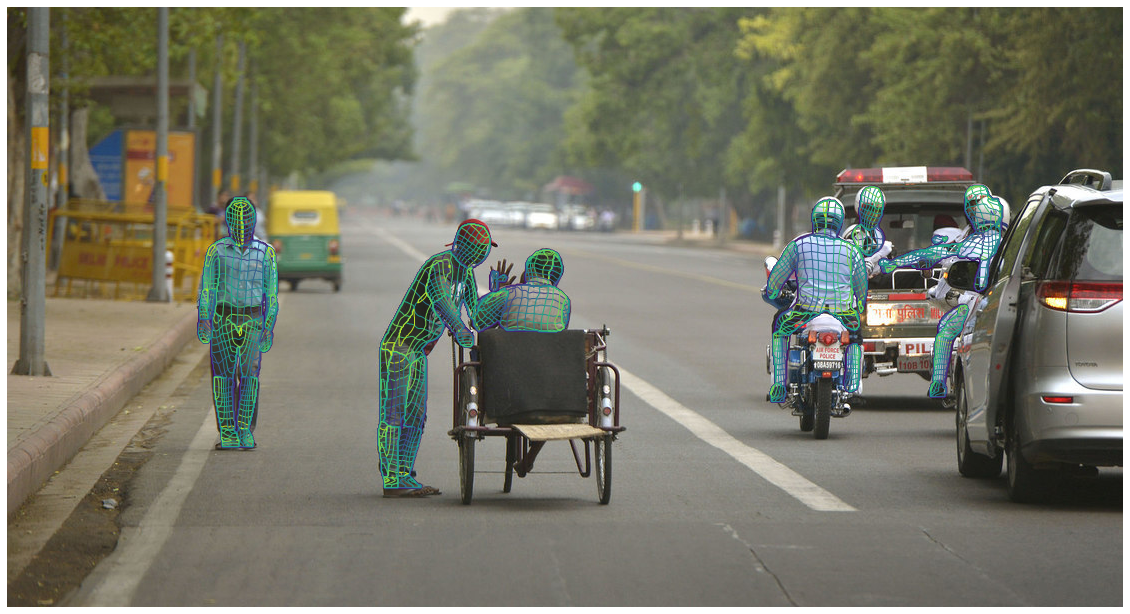

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

im  = cv2.imread('../DensePose/DensePoseData/demo_data/demo_im.jpg')
IUV = cv2.imread('../DensePose/DensePoseData/infer_out/demo_im_IUV.png')
INDS = cv2.imread('../DensePose/DensePoseData/infer_out/demo_im_INDS.png',  0)

fig = plt.figure(figsize=[20, 20])
plt.imshow( im[:,:,::-1] )
plt.contour( IUV[:,:,1]/256.,10, linewidths = 1 )
plt.contour( IUV[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

In [40]:
# plt.imshow( im[:,:,::-1] )
# plt.contour( IUV[:,:,1]/256.,10, linewidths = 1 )
plt.contour( IUV[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

IndexError: too many indices for array

In [42]:
plt.contour( INDS[:,:,1]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

IndexError: too many indices for array

# Area Test

In [73]:
# https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_32x8d_s1x-e2e.pkl

!export CUDA_VISIBLE_DEVICES=1,2 && cd $PROJECT_FOLDER/$project_name && python2 tools/infer_simple.py \
    --cfg configs/DensePose_ResNet101_FPN_32x8d_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_32x8d_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg
    

Found Detectron ops lib: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  51: Loading 

In [18]:
# https://github.com/facebookresearch/DensePose/blob/master/configs/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e.yaml
# https://dl.fbaipublicfiles.com/densepose/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e.pkl
# DensePose_ResNet50_FPN_single_GPU.yaml
# !export CUDA_VISIBLE_DEVICES=0 && 
!cd $PROJECT_FOLDER/$project_name && python2 tools/infer_simple.py \
    --cfg configs/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  51: Loading 

In [71]:
# !rm ../DensePose/DensePoseData/infer_out/*
PROJECT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis"
densePoseModelName = "DensePose_ResNet101_FPN_32x8d_s1x-e2e" #conf -> .yaml weights -> .pkl
# densePoseModelName = "DensePose_ResNet101_FPN_s1x-e2e" #conf -> .yaml weights -> .pkl
densePoseConfig = densePoseModelName+".yaml"
densePoseWeigths = densePoseModelName+".pkl"

!export CUDA_VISIBLE_DEVICES=0 && cd $PROJECT_FOLDER/DensePose && python2 tools/infer_simple.py \
    --cfg configs/$densePoseConfig \
    --wts https://dl.fbaipublicfiles.com/densepose/$densePoseWeigths \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  51: Loading 

In [96]:
!export CUDA_VISIBLE_DEVICES=1,2 && cd $PROJECT_FOLDER/$project_name && python2 tools/infer_simple.py \
    --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /data/students_home/amoscatelli/Desktop/actionAnalysis/anaconda2/lib/python2.7/site-packages/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  51: Loading 

In [23]:
from IPython.display import Image
Image("DensePoseData/infer_out/demo_im_IUV.png")
# DensePoseData/infer_out/demo_im_IUV.png

In [17]:
!ls ../DensePose/DensePoseData/infer_out/
# torch.cuda.device_count()

demo_im-Copy1.jpg.pdf	demo_im_INDS.png       demo_im_IUV.png
demo_im_INDS-Copy1.png	demo_im_IUV-Copy1.png  demo_im.jpg.pdf


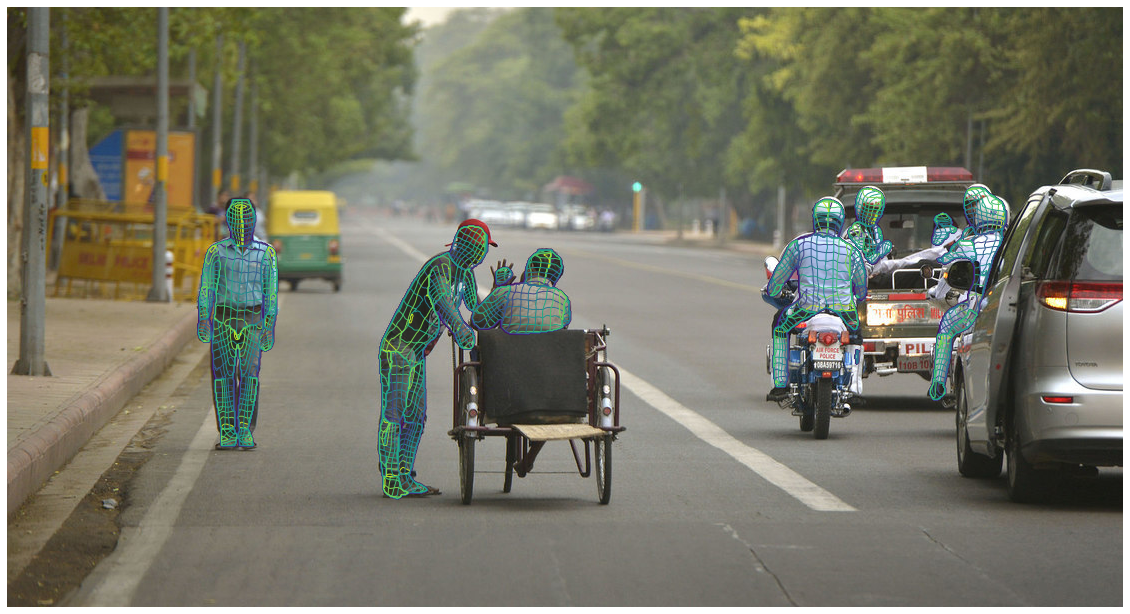

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

im  = cv2.imread('../DensePose/DensePoseData/demo_data/demo_im.jpg')
IUV = cv2.imread('../DensePose/DensePoseData/infer_out/demo_im_IUV.png')
INDS = cv2.imread('../DensePose/DensePoseData/infer_out/demo_im_INDS.png',  0)

fig = plt.figure(figsize=[20, 20])
plt.imshow( im[:,:,::-1] )
plt.contour( IUV[:,:,1]/256.,10, linewidths = 1 )
plt.contour( IUV[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') ; plt.show()

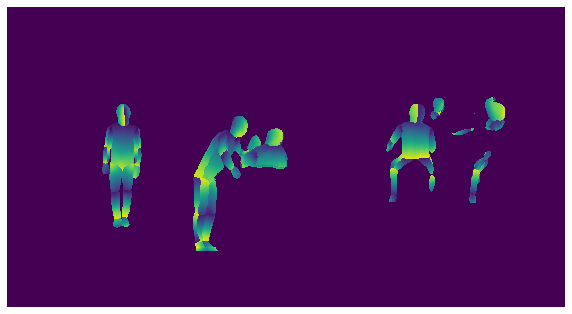

In [30]:
import os
from os.path import exists, join, basename, splitext
import cv2
import matplotlib.pyplot as plt
import numpy as np
git_repo_url = 'https://github.com/facebookresearch/DensePose.git'
project_name = splitext(basename(git_repo_url))[0]

im  = cv2.imread('../DensePose/DensePoseData/demo_data/demo_im.jpg')
IUV = cv2.imread('../DensePose/DensePoseData/infer_out/demo_im_IUV.png')
INDS = cv2.imread('../DensePose/DensePoseData/infer_out/demo_im_INDS.png',  0)

fig = plt.figure(figsize=[10, 10])
# plt.imshow( im[:,:,::-1] )
plt.imshow( IUV[:,:,1]/256.)
# plt.contour( IUV[:,:,1]/256.,10, linewidths = 1 )
# plt.contour( IUV[:,:,2]/256.,10, linewidths = 1 )
plt.axis('off') 
# plt.imshow()
plt.show()

In [36]:
IUV.shape

(600, 1116, 3)

In [9]:
!ls ../DensePose/DensePoseData/demo_data/

anaconda2			   miniconda3
Anaconda2-2019.03-Linux-x86_64.sh  Miniconda3-latest-Linux-x86_64.sh
anaconda3			   posenet-python
DensePose			   posenet-pytorch
detectron2_repo			   pytorch
images				   src
inputData


In [9]:
import subprocess, re, os, sys

# GPU picking
# http://stackoverflow.com/a/41638727/419116
# Nvidia-smi GPU memory parsing.
# Tested on nvidia-smi 370.23

def run_command(cmd):
    """Run command, return output as string."""
    
    output = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]
    return output.decode("ascii")

def list_available_gpus():
    """Returns list of available GPU ids."""
    
    output = run_command("nvidia-smi -L")
    # lines of the form GPU 0: TITAN X
    gpu_regex = re.compile(r"GPU (?P<gpu_id>\d+):")
    result = []
    for line in output.strip().split("\n"):
        m = gpu_regex.match(line)
        assert m, "Couldnt parse "+line
        result.append(int(m.group("gpu_id")))
    return result

def gpu_memory_map():
    """Returns map of GPU id to memory allocated on that GPU."""

    output = run_command("nvidia-smi")
    gpu_output = output[output.find("GPU Memory"):]
    # lines of the form
    # |    0      8734    C   python                                       11705MiB |
    memory_regex = re.compile(r"[|]\s+?(?P<gpu_id>\d+)\D+?(?P<pid>\d+).+[ ](?P<gpu_memory>\d+)MiB")
    rows = gpu_output.split("\n")
    result = {gpu_id: 0 for gpu_id in list_available_gpus()}
    for row in gpu_output.split("\n"):
        m = memory_regex.search(row)
        if not m:
            continue
        gpu_id = int(m.group("gpu_id"))
        gpu_memory = int(m.group("gpu_memory"))
        result[gpu_id] += gpu_memory
    return result

def pick_gpu_lowest_memory():
    """Returns GPU with the least allocated memory"""

    memory_gpu_map = [(memory, gpu_id) for (gpu_id, memory) in gpu_memory_map().items()]
    best_memory, best_gpu = sorted(memory_gpu_map)[0]
    return best_gpu

def setup_one_gpu():
    assert not 'tensorflow' in sys.modules, "GPU setup must happen before importing TensorFlow"
    gpu_id = pick_gpu_lowest_memory()
    print("Picking GPU "+str(gpu_id))
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)

def setup_no_gpu():
    if 'tensorflow' in sys.modules:
        print("Warning, GPU setup must happen before importing TensorFlow")
    os.environ["CUDA_VISIBLE_DEVICES"] = ''

In [12]:
list_available_gpus()
setup_one_gpu()

[0, 1, 2]

In [24]:
# !ls ../inputData/S001C001P002R001A008_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x/
# !ls ../inputData/S001C002P005R002A031_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x/

frame0000.pickle  frame0014.pickle  frame0028.pickle  frame0042.pickle
frame0001.pickle  frame0015.pickle  frame0029.pickle  frame0043.pickle
frame0002.pickle  frame0016.pickle  frame0030.pickle  frame0044.pickle
frame0003.pickle  frame0017.pickle  frame0031.pickle  frame0045.pickle
frame0004.pickle  frame0018.pickle  frame0032.pickle  frame0046.pickle
frame0005.pickle  frame0019.pickle  frame0033.pickle  frame0047.pickle
frame0006.pickle  frame0020.pickle  frame0034.pickle  frame0048.pickle
frame0007.pickle  frame0021.pickle  frame0035.pickle  frame0049.pickle
frame0008.pickle  frame0022.pickle  frame0036.pickle  frame0050.pickle
frame0009.pickle  frame0023.pickle  frame0037.pickle  frame0051.pickle
frame0010.pickle  frame0024.pickle  frame0038.pickle  frame0052.pickle
frame0011.pickle  frame0025.pickle  frame0039.pickle  frame0053.pickle
frame0012.pickle  frame0026.pickle  frame0040.pickle  frame0054.pickle
frame0013.pickle  frame0027.pickle  frame0041.pickle


In [74]:
!nvidia-smi

Thu Dec 12 00:26:49 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 430.50       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro K600         Off  | 00000000:02:00.0  On |                  N/A |
| 25%   47C    P8    N/A /  N/A |    961MiB /   980MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX TIT...  Off  | 00000000:03:00.0 Off |                  N/A |
| 22%   47C    P8    18W / 250W |   2431MiB / 12212MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [15]:
!top

=top - 17:53:44 up 21 days, 20:55,  1 user,  load average: 3,06, 2,94, 2,78
Tasks: 702 total,   2 running, 557 sleeping,   0 stopped,   1 zombie
%Cpu(s):  3,1 us,  1,6 sy,  2,0 ni, 92,8 id,  0,5 wa,  0,0 hi,  0,0 si,  0,0 st
KiB Mem : 65834224 total,  9334600 free, 23530304 used, 32969320 buff/cache
KiB Swap: 63999996 total, 60192200 free,  3807796 used. 41181880 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND     
23242 vaccaro   20   0  0,119t 0,010t 567884 R 152,9 17,0  45:55.46 python      
25850 amoscat+  20   0   44396   4428   3160 R  17,6  0,0   0:00.05 top         
    1 root      20   0  226372   7628   4996 S   0,0  0,0   1:37.84 systemd     
    2 root      20   0       0      0      0 S   0,0  0,0   0:00.66 kthreadd    
    4 root       0 -20       0      0      0 I   0,0  0,0   0:00.00 kworker/0:+ 
    5 root      20   0       0      0      0 I   0,0  0,0   0:00.00 kworker/u4+ 
    7 root       0 -20       0      0      0 I   0,0  

In [10]:
# !rm -r ../inputData/S003C002P015R001A007_rgb/DensePose-DensePose_ResNet101_FPN_32x8d_s1x-e2e/

In [9]:
# !ls ../inputData/S003C002P015R001A007_rgb/PoseNet-101/

frame0000.pickle  frame0016.pickle  frame0032.pickle  frame0048.pickle
frame0001.pickle  frame0017.pickle  frame0033.pickle  frame0049.pickle
frame0002.pickle  frame0018.pickle  frame0034.pickle  frame0050.pickle
frame0003.pickle  frame0019.pickle  frame0035.pickle  frame0051.pickle
frame0004.pickle  frame0020.pickle  frame0036.pickle  frame0052.pickle
frame0005.pickle  frame0021.pickle  frame0037.pickle  frame0053.pickle
frame0006.pickle  frame0022.pickle  frame0038.pickle  frame0054.pickle
frame0007.pickle  frame0023.pickle  frame0039.pickle  frame0055.pickle
frame0008.pickle  frame0024.pickle  frame0040.pickle  frame0056.pickle
frame0009.pickle  frame0025.pickle  frame0041.pickle  frame0057.pickle
frame0010.pickle  frame0026.pickle  frame0042.pickle  frame0058.pickle
frame0011.pickle  frame0027.pickle  frame0043.pickle  frame0059.pickle
frame0012.pickle  frame0028.pickle  frame0044.pickle  frame0060.pickle
frame0013.pickle  frame0029.pickle  frame0045.pickle  frame0061.pickle
frame0